In [1]:
from __future__ import print_function, division
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import h5py
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

In [2]:
plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

# Open file.

FILE_NAME = '3B-HHR-L.MS.MRG.3IMERG.20230917-S220000-E222959.1320.V06D.HDF5'
DATAFIELD_NAME = '/Grid/precipitationCal'
LATITUDE = '/Grid/lat'
LONGITUDE = '/Grid/lon'

with h5py.File(FILE_NAME, mode='r') as f:
    # List available datasets.
    print(f.keys())

    # Read dataset.
    dset = f[DATAFIELD_NAME]
    cal_precip_2200 = dset[0,:,:]
    print(cal_precip_2200,cal_precip_2200.shape)
    latitude_2200 = f[LATITUDE]
    lat_2200 = latitude_2200[:]
    print(lat_2200,lat_2200.shape)
    longitude_2200 = f[LONGITUDE]
    lon_2200 = longitude_2200[:]
    print(lon_2200,lon_2200.shape)

lat_imerg_2200,lon_imerg_2200 = np.meshgrid(lat_2200,lon_2200)
print(lat_imerg_2200,lat_imerg_2200.shape)
print(lon_imerg_2200,lon_imerg_2200.shape)
cal_precip_2200_max = np.amax(cal_precip_2200)
cal_precip_2200_min = np.amin(cal_precip_2200)
print("precip max =", cal_precip_2200_max)
print("precip min =", cal_precip_2200_min)
del_precip_2200 = np.gradient(cal_precip_2200)
del_precip_2200_x = del_precip_2200[0]
del_precip_2200_y = del_precip_2200[1]
print("Precip Gradient X = ", del_precip_2200_x)
print("Precip Gradient Y = ", del_precip_2200_y)
mag_2200 = np.sqrt(del_precip_2200[0]**2 + del_precip_2200[1]**2)
print("Precip Gradient = ", mag_2200)
cal_precip_2200[cal_precip_2200>3] = 2.7
mag_2200[mag_2200>6] = 2.5

# Open file.
FILE_NAME = '3B-HHR-L.MS.MRG.3IMERG.20230917-S223000-E225959.1350.V06D.HDF5'
DATAFIELD_NAME = '/Grid/precipitationCal'
LATITUDE = '/Grid/lat'
LONGITUDE = '/Grid/lon'

with h5py.File(FILE_NAME, mode='r') as f:
    # List available datasets.
    print(f.keys())

    # Read dataset.
    dset = f[DATAFIELD_NAME]
    cal_precip_2230 = dset[0,:,:]
    print(cal_precip_2230,cal_precip_2230.shape)
    latitude_2230 = f[LATITUDE]
    lat_2230 = latitude_2230[:]
    print(lat_2230,lat_2230.shape)
    longitude_2230 = f[LONGITUDE]
    lon_2230 = longitude_2230[:]
    print(lon_2230,lon_2230.shape)

lat_imerg_2230,lon_imerg_2230 = np.meshgrid(lat_2230,lon_2230)
print(lat_imerg_2230,lat_imerg_2230.shape)
print(lon_imerg_2230,lon_imerg_2230.shape)
cal_precip_2230_max = np.amax(cal_precip_2230)
cal_precip_2230_min = np.amin(cal_precip_2230)
print("precip max =", cal_precip_2230_max)
print("precip min =", cal_precip_2230_min)
del_precip_2230 = np.gradient(cal_precip_2230)
del_precip_2230_x = del_precip_2230[0]
del_precip_2230_y = del_precip_2230[1]
print("Precip Gradient X = ", del_precip_2230_x)
print("Precip Gradient Y = ", del_precip_2230_y)
mag_2230 = np.sqrt(del_precip_2230[0]**2 + del_precip_2230[1]**2)
print("Precip Gradient = ", mag_2230)
cal_precip_2230[cal_precip_2230>3] = 2.7
mag_2230[mag_2230>6] = 2.5

<KeysViewHDF5 ['Grid']>
[[-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
 [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
 [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
 ...
 [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
 [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]
 [-9999.9 -9999.9 -9999.9 ... -9999.9 -9999.9 -9999.9]] (3600, 1800)
[-89.95 -89.85 -89.75 ...  89.75  89.85  89.95] (1800,)
[-179.95 -179.85 -179.75 ...  179.75  179.85  179.95] (3600,)
[[-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 ...
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]] (3600, 1800)
[[-179.95 -179.95 -179.95 ... -179.95 -179.95 -179.95]
 [-179.85 -179.85 -179.85 ... -179.85 -179.85 -179.85]
 [-179.75 -179.75 -179.75 ... -179.75 -179.75 -179.75]
 ...
 [ 179.75  179.75  179.75 

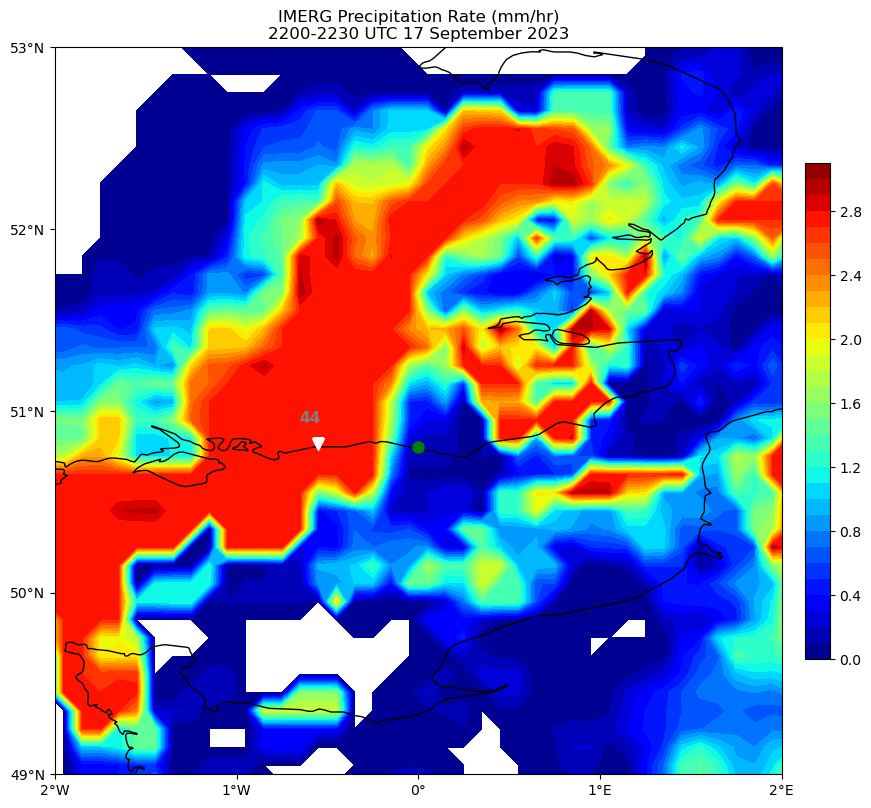

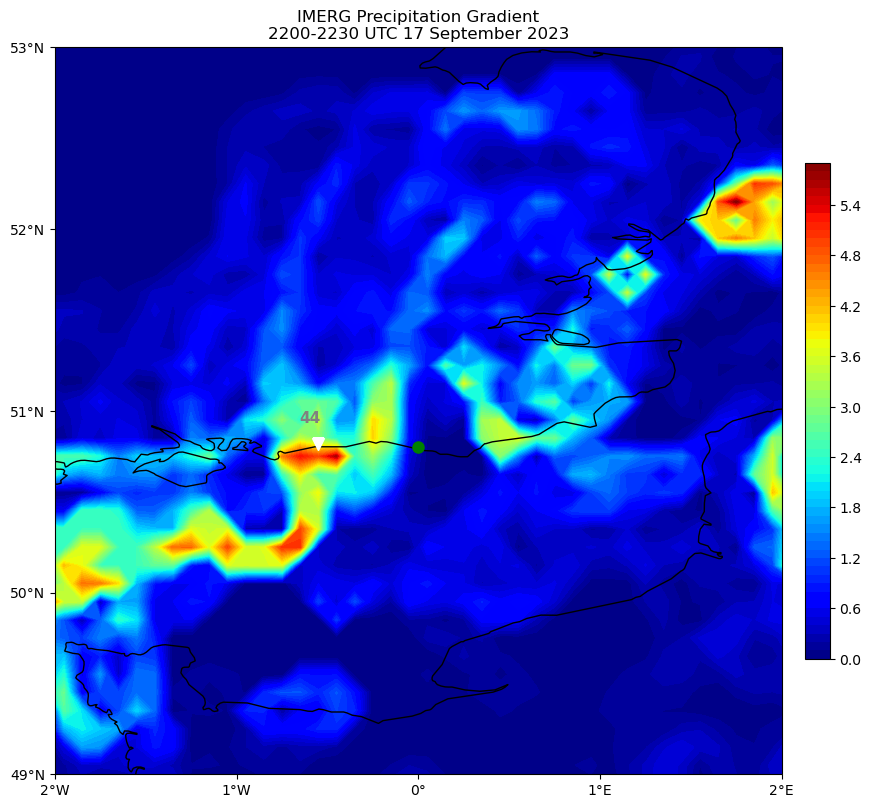

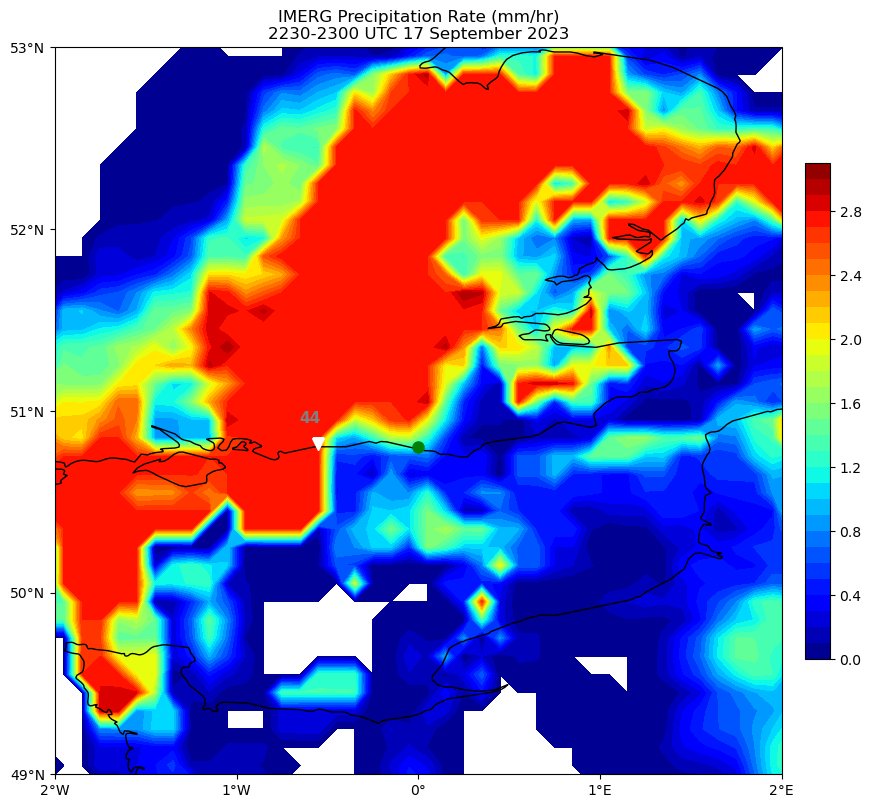

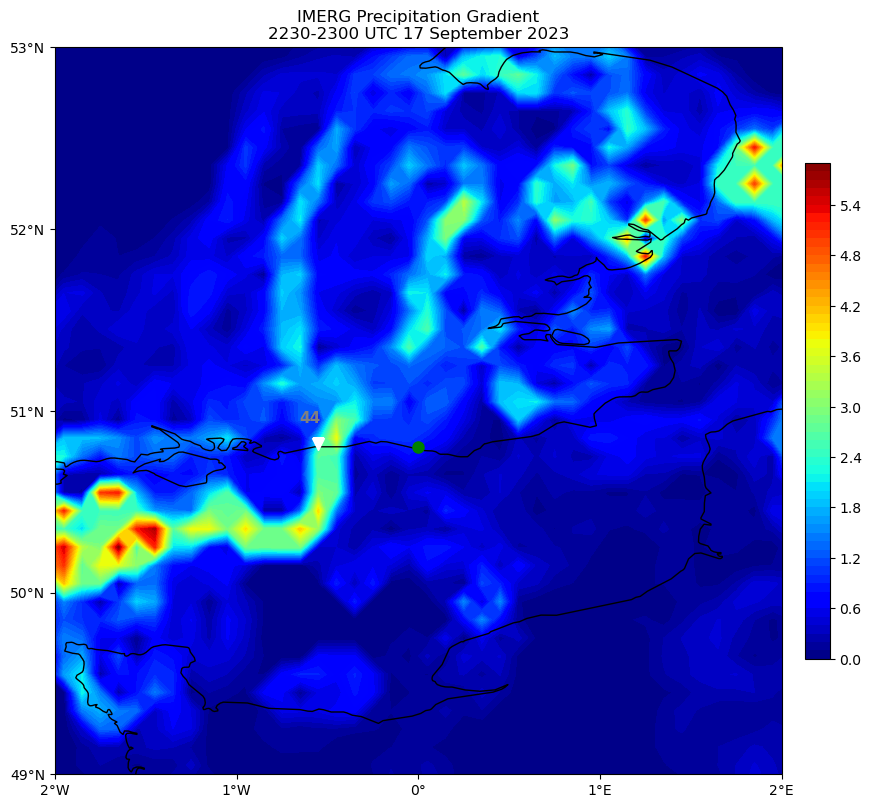

In [4]:
fig = plt.figure(figsize=(10, 12))
img_extent = (-2, 2, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-2, 2, 49, 53], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Rate (mm/hr)\n' 
          '2200-2230 UTC 17 September 2023')

Plevels = np.arange(0,3.2,0.1)
cbtd = ax.contourf(lon_imerg_2200,lat_imerg_2200,cal_precip_2200,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([49,50,51,52,53])   

ax.plot(0.0, 50.8, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-0.55, 50.82, 'vw', markersize=8, transform=crs.Geodetic())
ax.text(-0.595044, 51.003553, '44', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_precip_0917_2200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-2, 2, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-2, 2, 49, 53], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Gradient\n' 
          '2200-2230 UTC 17 September 2023')

Plevels = np.arange(0,6,0.1)
cbtd = ax.contourf(lon_imerg_2200,lat_imerg_2200,mag_2200,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([49,50,51,52,53])   

ax.plot(0.0, 50.8, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-0.55, 50.82, 'vw', markersize=8, transform=crs.Geodetic())
ax.text(-0.595044, 51.003553, '44', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_del_precip_0917_2200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-2, 2, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-2, 2, 49, 53], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Rate (mm/hr)\n' 
          '2230-2300 UTC 17 September 2023')

Plevels = np.arange(0,3.2,0.1)
cbtd = ax.contourf(lon_imerg_2230,lat_imerg_2230,cal_precip_2230,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([49,50,51,52,53])   

ax.plot(0.0, 50.8, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-0.55, 50.82, 'vw', markersize=8, transform=crs.Geodetic())
ax.text(-0.595044, 51.003553, '44', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
               
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_precip_0917_2230.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-2, 2, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-2, 2, 49, 53], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Gradient\n' 
          '2230-2300 UTC 17 September 2023')

Plevels = np.arange(0,6,0.1)
cbtd = ax.contourf(lon_imerg_2230,lat_imerg_2230,mag_2230,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([49,50,51,52,53])   

ax.plot(0.0, 50.8, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-0.55, 50.82, 'vw', markersize=8, transform=crs.Geodetic())
ax.text(-0.595044, 51.003553, '44', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
               
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_del_precip_0917_2230.png",dpi=250,bbox_inches='tight')
plt.show()

In [1]:
from __future__ import print_function, division
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm
import pandas as pd

def read_CMORPH_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    cmorph = nc_fid.variables["cmorph"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables["lat"][:]
    lon = nc_fid.variables["lon"][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return cmorph, lat, lon, names

cmorph_file = 'CMORPH2_0.25deg-30min_202309172200.RT.nc'
cmorph, lat, lon, names = read_CMORPH_plot(cmorph_file)
cmorph_2200 = cmorph[0,:,:]
cmorph_2200_w = cmorph[0,:,1400:1441]
cmorph_2200_e = cmorph[0,:,0:41]
cmorph_2200_con = np.concatenate((cmorph_2200_w, cmorph_2200_e), axis=1)
print("Concatenated Array: ", cmorph_2200_con, cmorph_2200_con.shape)
cmorph_2200_df = pd.DataFrame(cmorph_2200_con)
print(cmorph_2200_df)
cmorph_2200_df_int = cmorph_2200_df.ffill(axis=1)
print(cmorph_2200_df_int)
cmorph_2200_int = cmorph_2200_df_int.to_numpy()
print(cmorph_2200_int, cmorph_2200_int.shape)
lats,lons = np.meshgrid(lat, lon)
lats2 = np.swapaxes(lats, 0, 1)
lons2 = np.swapaxes(lons, 0, 1)
lats_w = lats2[:,1400:1441]
lats_e = lats2[:,0:41]
lats_con = np.concatenate((lats_w, lats_e), axis=1)
print("Concatenated Array: ", lats_con, lats_con.shape)
lons_w = lons2[:,1400:1441]
lons_w -= 360.0
lons_e = lons2[:,0:41]
lons_con = np.concatenate((lons_w, lons_e), axis=1)
print("Concatenated Array: ", lons_con, lons_con.shape)
print(names)
print('CMORPH:', cmorph_2200.shape, cmorph_2200)
print('Latitude:', lats2.shape, lats2)
print('Longitude:', lons2.shape, lons2)

del_cmorph_2200 = np.gradient(cmorph_2200_int)
del_cmorph_2200_x = del_cmorph_2200[0]
del_cmorph_2200_y = del_cmorph_2200[1]
print("Precip Gradient X = ", del_cmorph_2200_x)
print("Precip Gradient Y = ", del_cmorph_2200_y)
mag_2200 = np.sqrt(del_cmorph_2200[0]**2 + del_cmorph_2200[1]**2)
print("Precip Gradient = ", mag_2200)

cmorph_file = 'CMORPH2_0.25deg-30min_202309172230.RT.nc'
cmorph, lat, lon, names = read_CMORPH_plot(cmorph_file)
cmorph_2230 = cmorph[0,:,:]
cmorph_2230_w = cmorph[0,:,1400:1441]
cmorph_2230_e = cmorph[0,:,0:41]
cmorph_2230_con = np.concatenate((cmorph_2230_w, cmorph_2230_e), axis=1)
print("Concatenated Array: ", cmorph_2230_con, cmorph_2230_con.shape)
cmorph_2230_df = pd.DataFrame(cmorph_2230_con)
print(cmorph_2230_df)
cmorph_2230_df_int = cmorph_2230_df.ffill(axis=1)
print(cmorph_2230_df_int)
cmorph_2230_int = cmorph_2230_df_int.to_numpy()
print(cmorph_2230_int, cmorph_2230_int.shape)
lats,lons = np.meshgrid(lat, lon)
lats2 = np.swapaxes(lats, 0, 1)
lons2 = np.swapaxes(lons, 0, 1)
lats_w = lats2[:,1400:1441]
lats_e = lats2[:,0:41]
lats_con = np.concatenate((lats_w, lats_e), axis=1)
print("Concatenated Array: ", lats_con, lats_con.shape)
lons_w = lons2[:,1400:1441]
lons_w -= 360.0
lons_e = lons2[:,0:41]
lons_con = np.concatenate((lons_w, lons_e), axis=1)
print("Concatenated Array: ", lons_con, lons_con.shape)
print(names)
print('CMORPH:', cmorph_2230.shape, cmorph_2230)
print('Latitude:', lats2.shape, lats2)
print('Longitude:', lons2.shape, lons2)

del_cmorph_2230 = np.gradient(cmorph_2230_int)
del_cmorph_2230_x = del_cmorph_2230[0]
del_cmorph_2230_y = del_cmorph_2230[1]
print("Precip Gradient X = ", del_cmorph_2230_x)
print("Precip Gradient Y = ", del_cmorph_2230_y)
mag_2230 = np.sqrt(del_cmorph_2230[0]**2 + del_cmorph_2230[1]**2)
print("Precip Gradient = ", mag_2230)

Concatenated Array:  [[ 1.9999999e-01  2.0999999e-01  1.9999999e-01 ...  5.0999999e-01
   4.1000000e-01  4.2999998e-01]
 [ 2.3999999e-01  2.8000000e-01  2.9999998e-01 ...  7.9999995e-01
   6.8000001e-01  5.3999996e-01]
 [ 2.5000000e-01  2.6999998e-01  2.3999999e-01 ...  8.8000000e-01
   9.0999997e-01  8.8999999e-01]
 ...
 [-9.9900000e+02 -9.9900000e+02 -9.9900000e+02 ... -9.9900000e+02
  -9.9900000e+02 -9.9900000e+02]
 [-9.9900000e+02 -9.9900000e+02 -9.9900000e+02 ... -9.9900000e+02
  -9.9900000e+02 -9.9900000e+02]
 [-9.9900000e+02 -9.9900000e+02 -9.9900000e+02 ... -9.9900000e+02
  -9.9900000e+02 -9.9900000e+02]] (720, 81)
         0       1       2       3       4       5       6       7       8   \
0      0.20    0.21    0.20    0.20    0.20    0.21    0.25    0.28    0.30   
1      0.24    0.28    0.30    0.27    0.27    0.28    0.27    0.29    0.25   
2      0.25    0.27    0.24    0.24    0.23    0.22    0.21    0.22    0.22   
3      0.27    0.20    0.20    0.20    0.20    0.20  

         0       1       2       3       4       5       6       7       8   \
0      0.21    0.22    0.24    0.21    0.20    0.21    0.26    0.28    0.30   
1      0.24    0.29    0.30    0.29    0.27    0.29    0.28    0.30    0.26   
2      0.26    0.26    0.25    0.24    0.22    0.22    0.22    0.22    0.23   
3      0.28    0.21    0.20    0.20    0.20    0.20    0.20    0.20    0.20   
4      0.20    0.20    0.20    0.20    0.20    0.20    0.20    0.20    0.20   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
715 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00   
716 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00   
717 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00   
718 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00   
719 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00   

         9   ...      71      72      73      74   

In [ ]:
fig = plt.figure(figsize=(10, 12))
img_extent = (-2, 2, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-2, 2, 49, 53], crs.PlateCarree(globe=None))

plt.title('CMORPH Precipitation Rate (mm/hr)\n' 
          '2200 UTC 17 September 2023')

Plevels = np.arange(0,5,0.1)
cbtd = ax.contourf(lons2,lats2,cmorph_2200,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=5)

ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([49,50,51,52,53])   

ax.plot(0.0, 50.8, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-0.55, 50.82, 'vw', markersize=8, transform=crs.Geodetic())
ax.text(-0.595044, 51.003553, '44', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("cmorph_precip_0917_2200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-2, 2, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-2, 2, 49, 53], crs.PlateCarree(globe=None))

plt.title('CMORPH Precipitation Rate (mm/hr)\n' 
          '1500 UTC 17 September 2023')

Plevels = np.arange(0,5,0.1)
cbtd = ax.contourf(lons_con,lats_con,cmorph_2200_int,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=5)

ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([49,50,51,52,53])   

ax.plot(0.0, 50.8, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-0.55, 50.82, 'vw', markersize=8, transform=crs.Geodetic())
ax.text(-0.595044, 51.003553, '44', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("cmorph_int_precip_0917_2200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-2, 2, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-2, 2, 49, 53], crs.PlateCarree(globe=None))

plt.title('CMORPH Precipitation Gradient\n' 
          '2200 UTC 17 September 2023')

Plevels = np.arange(0,5,0.1)
cbtd = ax.contourf(lons_con,lats_con,mag_2200,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([49,50,51,52,53])   

ax.plot(0.0, 50.8, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-0.55, 50.82, 'vw', markersize=8, transform=crs.Geodetic())
ax.text(-0.595044, 51.003553, '44', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("cmorph_del_precip_0917_2200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-2, 2, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-2, 2, 49, 53], crs.PlateCarree(globe=None))

plt.title('CMORPH Precipitation Rate (mm/hr)\n' 
          '2230 UTC 17 September 2023')

Plevels = np.arange(0,8,0.1)
cbtd = ax.contourf(lons_con,lats_con,cmorph_2230_int,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=8)

ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([49,50,51,52,53])   

ax.plot(0.0, 50.8, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-0.55, 50.82, 'vw', markersize=8, transform=crs.Geodetic())
ax.text(-0.595044, 51.003553, '44', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("cmorph_precip_0917_2230.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-2, 2, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-2, 2, 49, 53], crs.PlateCarree(globe=None))

plt.title('CMORPH Precipitation Gradient\n' 
          '2230 UTC 17 September 2023')

Plevels = np.arange(0,5,0.1)
cbtd = ax.contourf(lons_con,lats_con,mag_2230,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([49,50,51,52,53])   

ax.plot(0.0, 50.8, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-0.55, 50.82, 'vw', markersize=8, transform=crs.Geodetic())
ax.text(-0.595044, 51.003553, '44', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("cmorph_del_precip_0917_2230.png",dpi=250,bbox_inches='tight')
plt.show()